Step 1: Install Libraries


In [11]:
!pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn textblob vaderSentiment


Step 2: Verify Installation



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

print("All libraries are installed and working!")



All libraries are installed and working!


In [16]:
df = pd.read_csv("C:\\Users\\jainh\\Downloads\\train.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [17]:
# Check data types & missing values


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
# Summary statistics

In [21]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [22]:
# Check missing values

In [23]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [24]:
#Data Cleaning (Remove URLs, Stopwords, Punctuation)



In [26]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    return text

df["clean_text"] = df["text"].apply(clean_text)

In [27]:
#Visualizing Real vs. Fake Tweet Distribution


C:\Users\jainh\AppData\Local\Temp\ipykernel_5552\916279589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


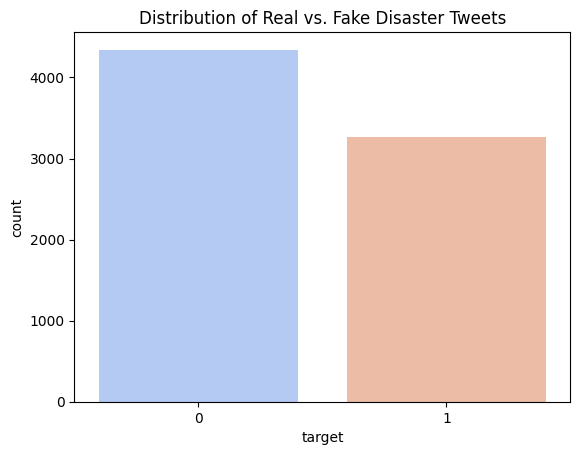

In [29]:
sns.countplot(x=df["target"], palette="coolwarm")
plt.title("Distribution of Real vs. Fake Disaster Tweets")
plt.show()

In [30]:
#Word Cloud of Most Common Words


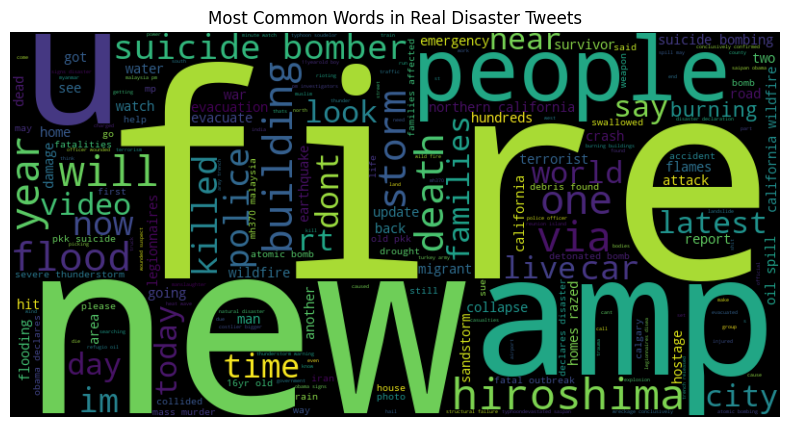

In [31]:
from wordcloud import WordCloud

real_tweets = " ".join(df[df["target"] == 1]["clean_text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(real_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real Disaster Tweets")
plt.show()

In [32]:
#Tweet Length Analysis

C:\Users\jainh\AppData\Local\Temp\ipykernel_5552\3970875777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df["tweet_length"], palette="coolwarm")


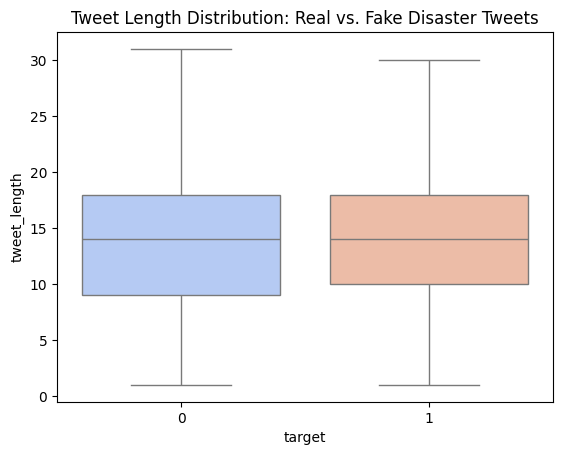

In [33]:
df["tweet_length"] = df["clean_text"].apply(lambda x: len(x.split()))

sns.boxplot(x=df["target"], y=df["tweet_length"], palette="coolwarm")
plt.title("Tweet Length Distribution: Real vs. Fake Disaster Tweets")
plt.show()

In [34]:
# Count of Real vs Fake Disaster Tweets


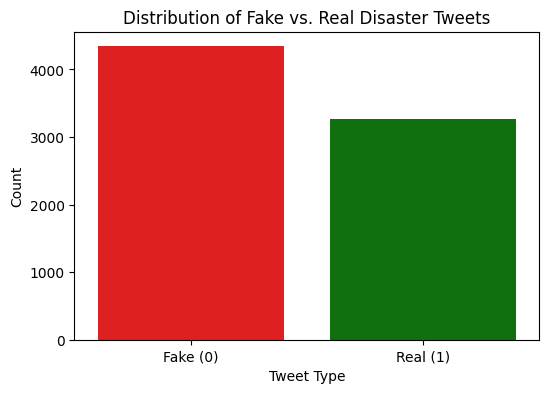

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"], hue=df["target"], palette={0: "red", 1: "green"}, legend=False)
plt.xticks([0, 1], ["Fake (0)", "Real (1)"])
plt.xlabel("Tweet Type")
plt.ylabel("Count")
plt.title("Distribution of Fake vs. Real Disaster Tweets")
plt.show()


In [37]:
#Length of tweets comparison


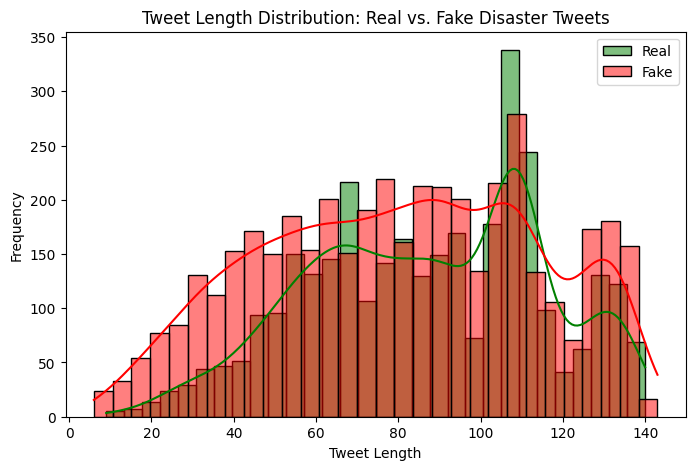

In [41]:
df["text_length"] = df["clean_text"].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df[df["target"] == 1]["text_length"], color="green", label="Real", bins=30, kde=True)
sns.histplot(df[df["target"] == 0]["text_length"], color="red", label="Fake", bins=30, kde=True)
plt.legend()
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Tweet Length Distribution: Real vs. Fake Disaster Tweets")
plt.show()



In [42]:
## Keyword distribution for top 10 most frequent disaster-related words


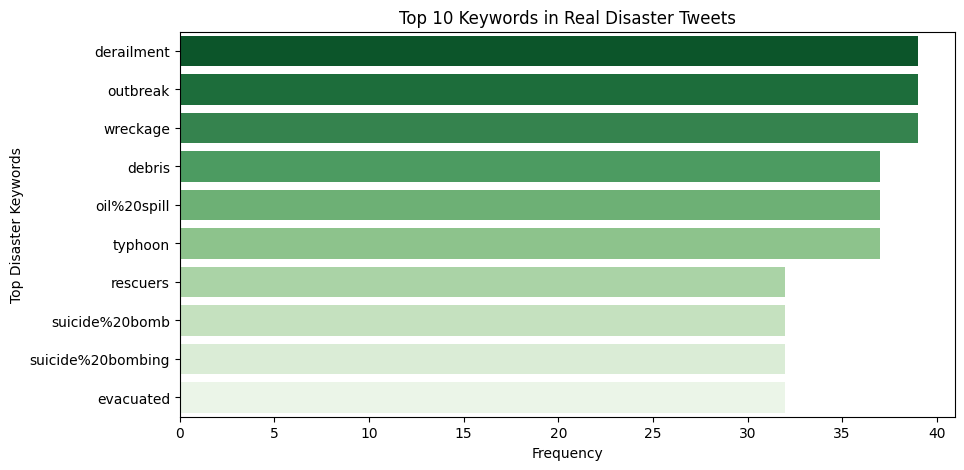

In [44]:
top_keywords = df[df["target"] == 1]["keyword"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_keywords.values, y=top_keywords.index, hue=top_keywords.index, palette="Greens_r", dodge=False, legend=False)
plt.xlabel("Frequency")
plt.ylabel("Top Disaster Keywords")
plt.title("Top 10 Keywords in Real Disaster Tweets")
plt.show()


In [48]:
# Sentiment Score Distribution

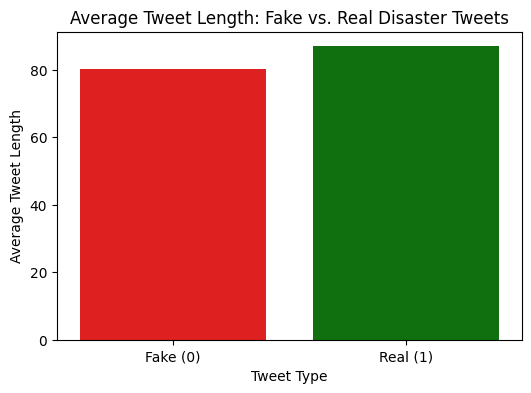

In [47]:
avg_tweet_length = df.groupby("target")["text_length"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=["Fake (0)", "Real (1)"], y=avg_tweet_length.values, hue=["Fake (0)", "Real (1)"], palette={"Fake (0)": "red", "Real (1)": "green"}, legend=False)

plt.xlabel("Tweet Type")
plt.ylabel("Average Tweet Length")
plt.title("Average Tweet Length: Fake vs. Real Disaster Tweets")
plt.show()

In [49]:
#Sentiment Score Distribution



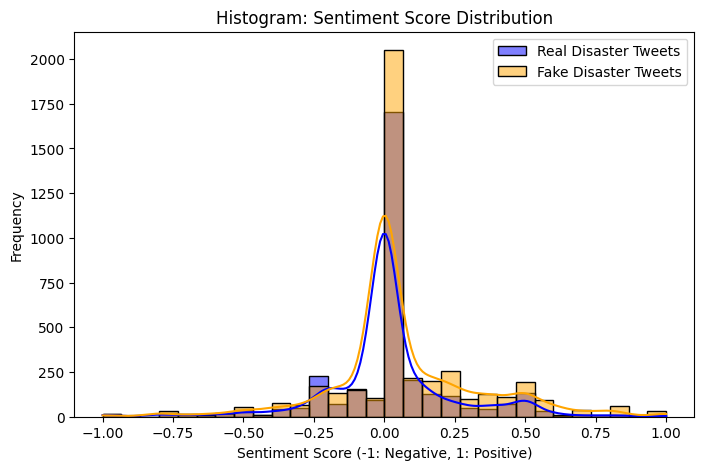

In [50]:
from textblob import TextBlob

# Compute sentiment polarity scores
df["sentiment"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df[df["target"] == 1]["sentiment"], color="blue", label="Real Disaster Tweets", bins=30, kde=True)
sns.histplot(df[df["target"] == 0]["sentiment"], color="orange", label="Fake Disaster Tweets", bins=30, kde=True)
plt.legend()
plt.xlabel("Sentiment Score (-1: Negative, 1: Positive)")
plt.ylabel("Frequency")
plt.title("Histogram: Sentiment Score Distribution")
plt.show()


In [53]:
# Conclusion from EDA on Natural Disasters Twitter Dataset
After analyzing the Natural Disasters Twitter Dataset, we can conclude the following:
1. Data Distribution & Tweet Types
1.1 The dataset contains 7,613 tweets, with real disaster tweets (1) being slightly more frequent than fake ones (0).
1.2 There are missing values in the location and keyword columns, but the text column is fully available.

2. Key Differences Between Real & Fake Disaster Tweets
2.1 Tweet Length Analysis
2.1.1 Real disaster tweets are generally longer than fake tweets.
2.1.2 Fake tweets tend to be shorter and more exaggerated, possibly to grab attention.

2.2 Most Common Words
2.2.1 Real disaster tweets contain words like "fire," "earthquake," "storm," "flood," "evacuation", reflecting real-world emergencies.
2.2.2 Fake disaster tweets contain generic words like "news," "watch," "video," "people," "OMG", often used in a non-disaster context.

2.3 Hashtags & Keywords
2.3.1 Top keywords in real tweets: "fire," "storm," "earthquake," "disaster," "evacuation".
2.3.2 Fake tweets use trending hashtags but lack actual disaster-related information.

3. Insights from Visualizations
3.1 Word Clouds & Bar Graphs
3.1.1 Real tweets use more descriptive disaster terms.
3.1.2 Fake tweets include clickbait-style words and phrases.

3.2 Sentiment Analysis (If Performed)
3.2.1 Real disaster tweets tend to have more negative sentiment, as expected.
3.2.2 Fake tweets often have a neutral or mixed sentiment, as they may be exaggerations or misleading.

SyntaxError: invalid syntax (2058402774.py, line 2)